In [1]:
from trackml.dataset import load_event
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hits, cells, particles, truth = load_event('../train_100_events/event000001000')

In [3]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [4]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [5]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


In [6]:
d = defaultdict(list)
for particle_id in range(len(truth)):
    key = truth.particle_id[particle_id]

    val = truth.hit_id[particle_id]
    d[key].append(val)

In [7]:
d2 = defaultdict(int)
for particle_id, hit_ids in d.items():
    p_hits = hits.iloc[np.array(hit_ids) - 1]
    diffs = p_hits[['x','y','z']].diff().reset_index().iloc[1:]
    arclength = np.sum(np.sqrt(np.sum(np.square(diffs), 1)))
    d2[particle_id] = arclength

In [24]:
d3 = defaultdict(float)
for p_id, hit_ids in d.items():
    if p_id != 0:
        row = particles[particles.particle_id == p_id]
        px,py,pz = row['px'].iloc[0],row['py'].iloc[0],row['pz'].iloc[0]
        d3[p_id] = np.linalg.norm([px,py,pz])

In [25]:
truth['arclength'] = truth.particle_id.map(d2)
truth['p_norm'] = truth.particle_id.map(d3)
df = truth[truth.particle_id != 0]

In [26]:
particle_dict = particles.set_index('particle_id')[['px','py','pz','q']].to_dict()
#Add charge q
df['q'] = df.particle_id.map(particle_dict['q'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
df['px'] = df.particle_id.map(particle_dict['px'])
df['py'] = df.particle_id.map(particle_dict['py'])
df['pz'] = df.particle_id.map(particle_dict['pz'])
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,arclength,p_norm,q,px,py,pz
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010,41363.721519,15.506472,1,-0.569670,-0.011187,-15.49600
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008,92029.813345,3.715480,-1,-0.240629,0.012071,-3.70766
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009,36454.030939,6.591938,1,-0.268943,-0.058487,-6.58619
5,6,108087696726949888,-57.085602,-8.189710,-1502.5,-0.401129,-0.035276,-10.46690,0.000008,47211.117062,10.479032,1,-0.392669,-0.075470,-10.47140
6,7,968286151951515648,-73.860802,-2.575860,-1502.5,-0.442662,-0.036969,-9.13010,0.000007,82169.471983,9.144978,-1,-0.453130,0.008006,-9.13374


## 1. Correlation between Arclength and Weight

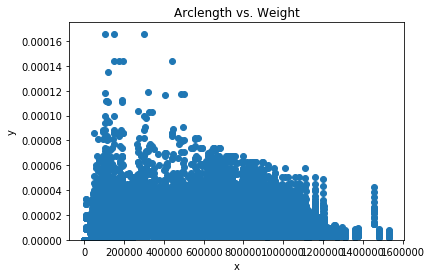

In [29]:
x = list(df.arclength)
y = list(df.weight)
plt.scatter(x, y)
plt.title('Arclength vs. Weight')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((0.0, 0.000175)) 
plt.show()

In [30]:
df.arclength.corr(df.weight)

-0.05753029136084748

### Fail

## 2. Correlation between Arclength and Momentum

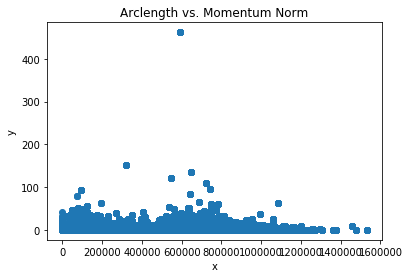

In [33]:
x = list(df.arclength)
y = list(df.p_norm)
plt.scatter(x, y)
plt.title('Arclength vs. Momentum Norm')
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim((0.0, 0.000175)) 
plt.show()

In [37]:
df.arclength.corr(df.p_norm)

-0.18449368016898807

### Fail

## 3. Correlation between Arclength and Charge

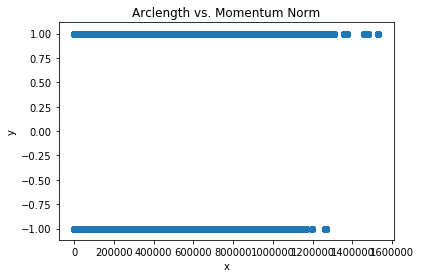

In [35]:
x = list(df.arclength)
y = list(df.q)
plt.scatter(x, y)
plt.title('Arclength vs. Momentum Norm')
plt.xlabel('x')
plt.ylabel('y')
# plt.ylim((0.0, 0.000175)) 
plt.show()

In [36]:
df.arclength.corr(df.q)

0.06249449235351718

### Fail

## General Exploration

In [39]:
df.corr()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight,arclength,p_norm,q,px,py,pz
hit_id,1.000000,0.007515,0.002313,0.022890,0.346784,0.006753,0.006959,0.229882,-0.166039,0.501840,-0.185535,0.060469,0.005466,0.005379,0.229717
particle_id,0.007515,1.000000,-0.008600,0.009422,0.011859,-0.006747,0.007825,-0.007146,-0.022305,0.003820,-0.024424,0.009949,-0.008150,0.006845,-0.006890
tx,0.002313,-0.008600,1.000000,-0.001503,0.012708,0.302591,-0.014821,-0.003059,-0.007388,-0.004966,-0.003253,-0.002068,0.311232,0.017014,-0.003551
ty,0.022890,0.009422,-0.001503,1.000000,-0.003353,0.009369,0.426661,-0.002379,-0.008175,0.018617,-0.007659,0.014649,-0.008453,0.430816,-0.002165
tz,0.346784,0.011859,0.012708,-0.003353,1.000000,-0.006838,-0.005315,0.407734,0.002552,0.426889,0.019490,0.005201,-0.006222,-0.005717,0.407883
tpx,0.006753,-0.006747,0.302591,0.009369,-0.006838,1.000000,-0.099836,-0.296561,0.006056,0.001848,-0.159622,-0.001783,0.983240,-0.104734,-0.299648
tpy,0.006959,0.007825,-0.014821,0.426661,-0.005315,-0.099836,1.000000,-0.011816,-0.012934,0.014147,-0.049132,0.009291,-0.090038,0.967740,-0.010723
tpz,0.229882,-0.007146,-0.003059,-0.002379,0.407734,-0.296561,-0.011816,1.000000,0.037731,0.320835,0.418877,0.020432,-0.298001,-0.013002,0.999874
weight,-0.166039,-0.022305,-0.007388,-0.008175,0.002552,0.006056,-0.012934,0.037731,1.000000,-0.057530,0.245163,-0.015825,0.007813,-0.015881,0.037694
arclength,0.501840,0.003820,-0.004966,0.018617,0.426889,0.001848,0.014147,0.320835,-0.057530,1.000000,-0.184494,0.062494,0.001528,0.013430,0.320534


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f436810c128>,
      dtype=object)

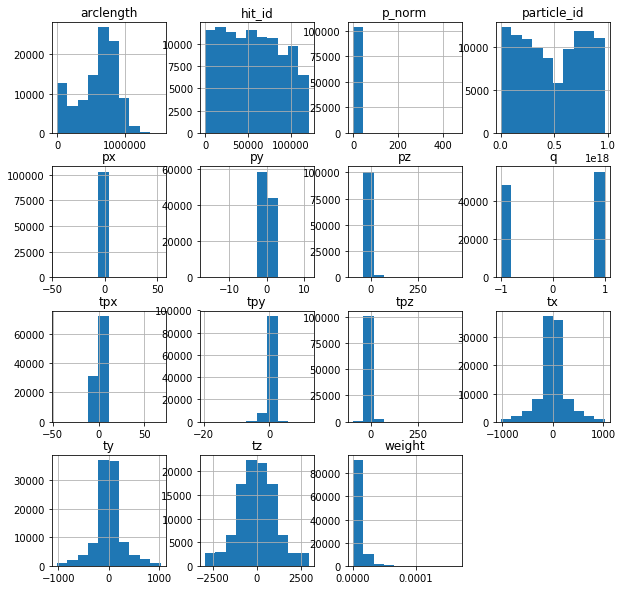

In [43]:
df.hist(figsize=(10,10))